# Exploratory Data Analysis Project using python

In [26]:
#Import the different useful library for Data analysis
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
# To know my working directory
os.getcwd( )
os.chdir('C:/Users/zahira/Desktop/Dataviz_with_python') 

# Reading Dataset

In [15]:
#Collect data with function read_csv of pandas library
data = pd.read_csv("used_cars_data.csv")


In [17]:
# Todisplay the top 5 observations of the dataset
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [18]:
#To display the last 5 observations of the dataset
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


To understand the data type and information about data (number of records in each column, data having null or not null, Data type, the memory usage of the dataset...), we use: data.info()


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


data.info() shows the variables Mileage, Engine, Power, Seats, New_Price, and Price have missing values. Numeric variables like Mileage, Power are of datatype as  float64 and int64. Categorical variables like Location, Fuel_Type, Transmission, and Owner Type are of object data type

In [22]:
#To check for duplication
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [24]:
#to identify null values in the data and get the number of missing records in each column
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [25]:
#To calculate the percentage of missing values in each column
(data.isnull().sum()/(len(data)))*100


S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

The percentage of missing values for the columns New_Price and Price is ~86% and ~17%, respectively.

# Data Reduction

Some columns or variables can be dropped if they do not add value to our analysis.
In our dataset, the column S.No have only ID values, assuming they don’t have any predictive power to predict the dependent variable.

In [28]:
# Data Reduction / Remove S.No. column from data
data = data.drop(['S.No.'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


# Feature Engineering

Why I use this method ?
Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

# Creating Features

We will play around with the variables Year and Name in our dataset. If we see the sample data, the column “Year” shows the manufacturing year of the car.

It would be difficult to find the car’s age if it is in year format as the Age of the car is a contributing factor to Car Price. 

Introducing a new column, “Car_Age” to know the age of the car

In [29]:
from datetime import date
date.today().year
data['Car_Age']=date.today().year-data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,12
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,7
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,11
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,10
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,9


Since car names will not be great predictors of the price in our current data. But we can process this column to extract important information using brand and Model names. Let’s split the name and introduce new variables “Brand” and “Model”

In [33]:
data['Brand'] = data.Name.str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


# Data Cleaning/Wrangling

We can see that some names of the variables are not relevant and not easy to understand. Some data may have data entry errors, and some variables may need data type conversion. We need to fix this issue in the data.

In the case of he brand name ‘Isuzu’ ‘ISUZU’ and ‘Mini’ and ‘Land’ looks incorrect. This needs to be corrected

In [37]:
print(data.Brand.unique())
print(data.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


In [38]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,8,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,10,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,5,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,4,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,5,Mini,CooperConvertible


We have done the fundamental data analysis, Featuring, and data clean-up. Let’s move to the EDA process 

Voila!! Our Data is ready to perform EDA.

# Exploratory Data Analysis (EDA)

Importance of EDA are :
EDA can be leveraged to check for outliers, patterns, and trends in the given data.
EDA helps to find meaningful patterns in data.
EDA provides in-depth insights into the data sets to solve our business problems.
EDA gives a clue to impute missing values in the dataset

# Statistics Summary

The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe() – Provide a statistics summary of data belonging to numerical datatype such as int, float

In [43]:
data.describe()

,Year,Kilometers_Driven,Seats,Price,Car_Age
count,7253.000000,7.253000e+03,7200.000000,6019.000000,7253.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468,8.634634
std,3.254421,8.442772e+04,0.811660,11.187917,3.254421
min,1996.000000,1.710000e+02,0.000000,0.440000,3.000000
25%,2011.000000,3.400000e+04,5.000000,3.500000,6.000000
50%,2014.000000,5.341600e+04,5.000000,5.640000,8.000000
75%,2016.000000,7.300000e+04,5.000000,9.950000,11.000000
max,2019.000000,6.500000e+06,10.000000,160.000000,26.000000


In [45]:
# For the transposition
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0
Car_Age,7253.0,8.634634,3.254421,3.00,6.0,8.00,11.00,26.0


From the statistics summary, we can infer the below findings :

Years range from 1996- 2019 and has a high in a range which shows used cars contain both latest models and old model cars.
On average of Kilometers-driven in Used cars are ~58k KM. The range shows a huge difference between min and max as max values show 650000 KM shows the evidence of an outlier. This record can be removed.
Min value of Mileage shows 0 cars won’t be sold with 0 mileage. This sounds like a data entry issue.
It looks like Engine and Power have outliers, and the data is right-skewed.
The average number of seats in a car is 5. car seat is an important feature in price contribution.
The max price of a used car is 160k which is quite weird, such a high price for used cars. There may be an outlier or data entry issue.
describe(include=’all’) provides a statistics summary of all data, include object, category etc...

In [47]:
#describe(include=’all’) provides a statistics summary of all data, include object, category etc

data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7207,386,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Before we do EDA, lets separate Numerical and categorical variables for easy analysis

In [48]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age']


# EDA Univariate Analysis

Analyzing/visualizing the dataset by taking one variable at a time:

Data visualization is essential; we must decide what charts to plot to better understand the data. In this article, we visualize our data using Matplotlib and Seaborn libraries.

Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.

Seaborn is also a python library built on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy

Univariate analysis can be done for both Categorical and Numerical variables.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

In our example, we have done a Univariate analysis using Histogram and  Box Plot for continuous Variables.

In the below fig, a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

Year
Skew : -0.84


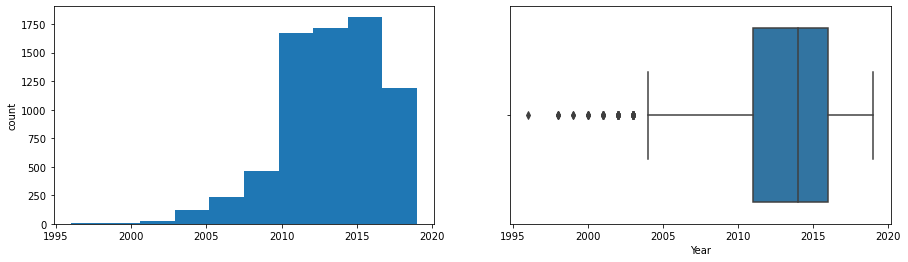

Kilometers_Driven
Skew : 61.58


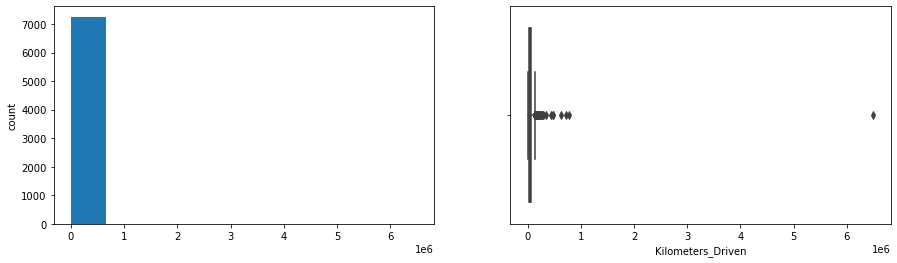

Seats
Skew : 1.9


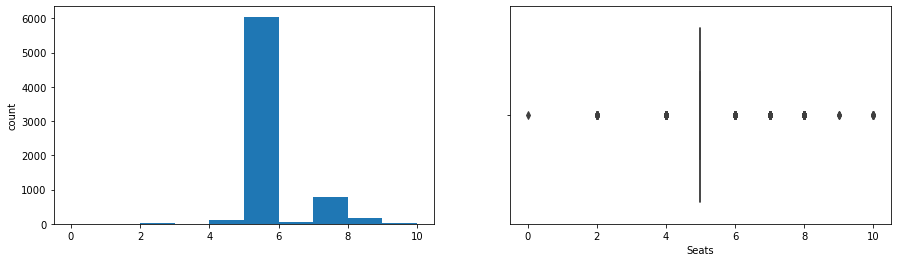

Price
Skew : 3.34


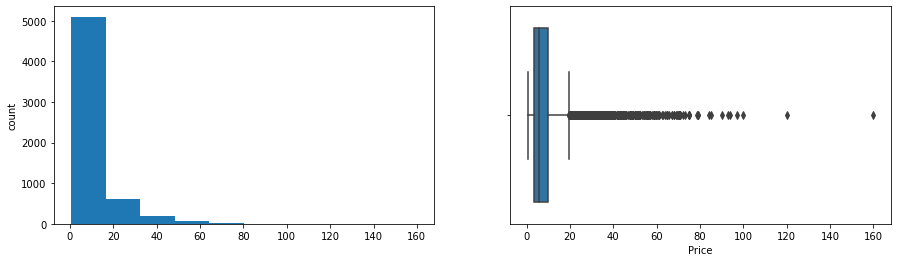

Car_Age
Skew : 0.84


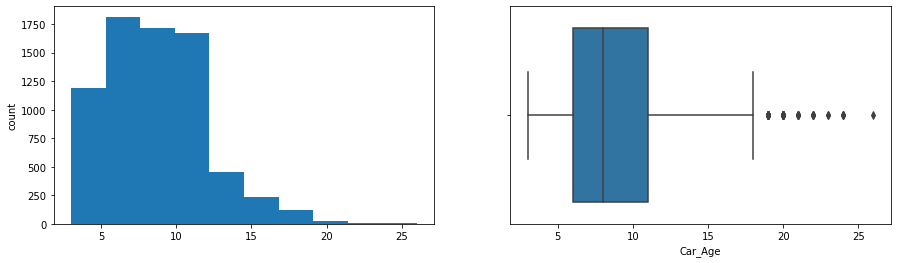

In [49]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

Price and Kilometers Driven are right skewed for this data to be transformed, and all outliers will be handled during imputation

categorical variables are being visualized using a count plot. Categorical variables provide the pattern of factors influencing car price

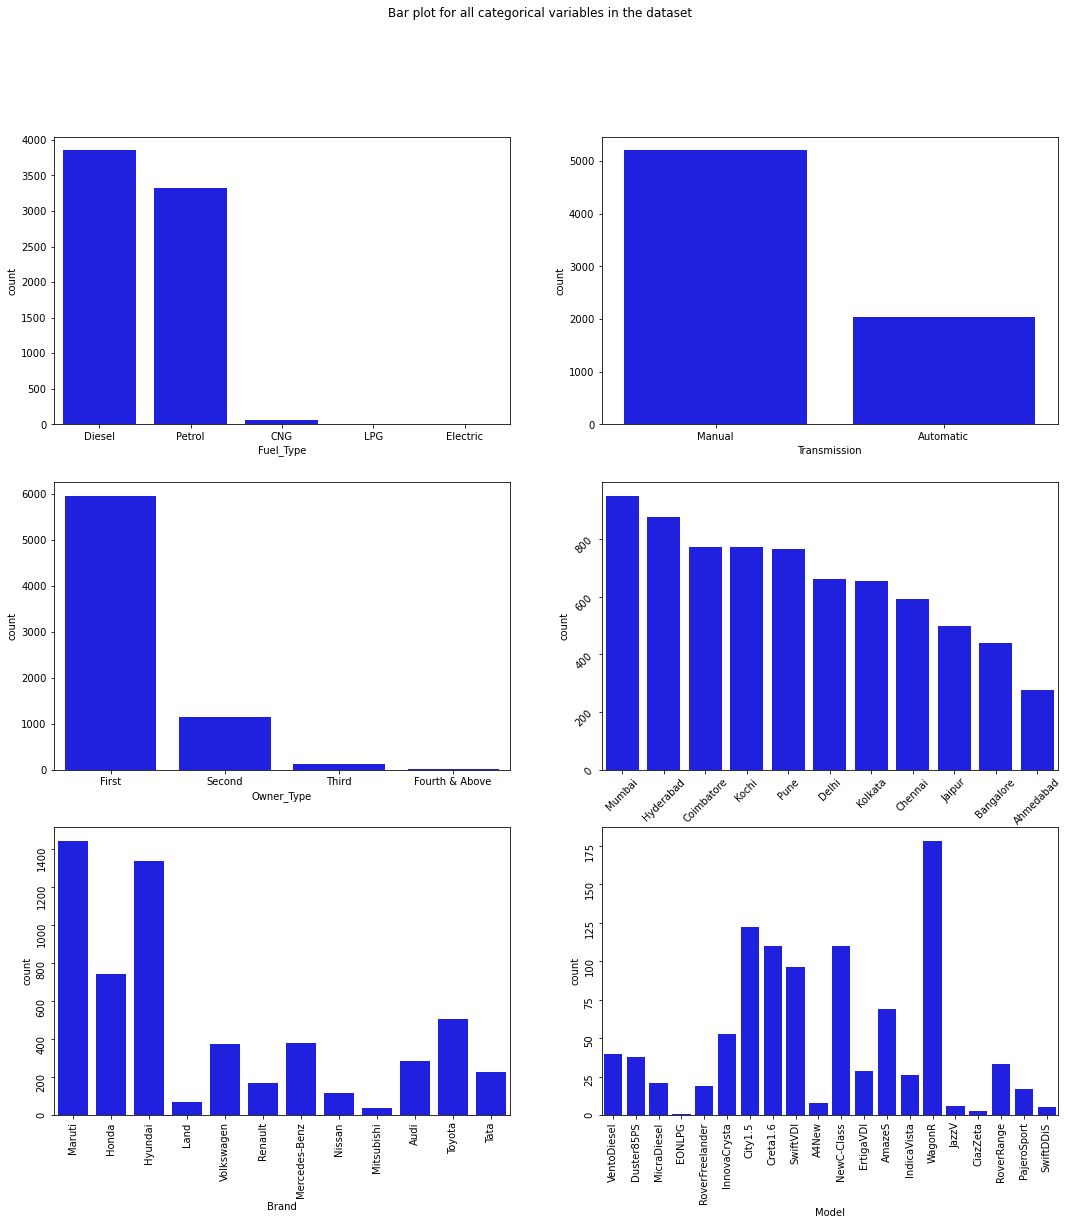

In [50]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue', 
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'blue', 
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'blue', 
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'blue', 
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'blue', 
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'blue', 
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

From the count plot, we can have below observations:

Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore.


~53% of cars have fuel type as Diesel this shows diesel cars provide higher performance.


~72% of cars have manual transmission.


~82 % of cars are First owned cars. This shows most of the buyers prefer to purchase first-owner cars.


~20% of cars belong to the brand Maruti followed by 19% of cars belonging to Hyundai.


WagonR ranks first among all models which are available for purchase.


# Data Transformation

Before we proceed to Bi-variate Analysis, Univariate analysis demonstrated the data pattern as some variables to be transformed.

Price and Kilometer-Driven variables are highly skewed and on a larger scale. Let’s do log transformation.

Log transformation can help in normalization, so this variable can maintain standard scale with other variables:

In [51]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [52]:
log_transform(data,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7253 non-null   object 
 1   Location               7253 non-null   object 
 2   Year                   7253 non-null   int64  
 3   Kilometers_Driven      7253 non-null   int64  
 4   Fuel_Type              7253 non-null   object 
 5   Transmission           7253 non-null   object 
 6   Owner_Type             7253 non-null   object 
 7   Mileage                7251 non-null   object 
 8   Engine                 7207 non-null   object 
 9   Power                  7207 non-null   object 
 10  Seats                  7200 non-null   float64
 11  New_Price              1006 non-null   object 
 12  Price                  6019 non-null   float64
 13  Car_Age                7253 non-null   int64  
 14  Brand                  7253 non-null   object 
 15  Mode

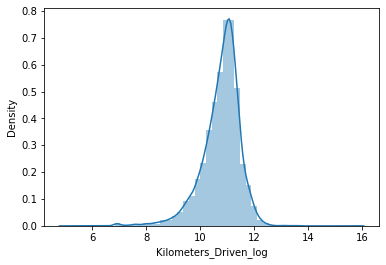

In [53]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");

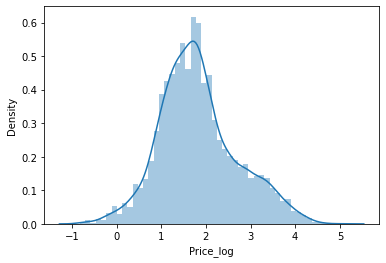

In [54]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(data["Price_log"], axlabel="Price_log");

# EDA Bivariate Analysis

EDA Bivariate Analysis
Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

In our case, a pair plot has been used to show the relationship between two Categorical variables.

<Figure size 936x1224 with 0 Axes>

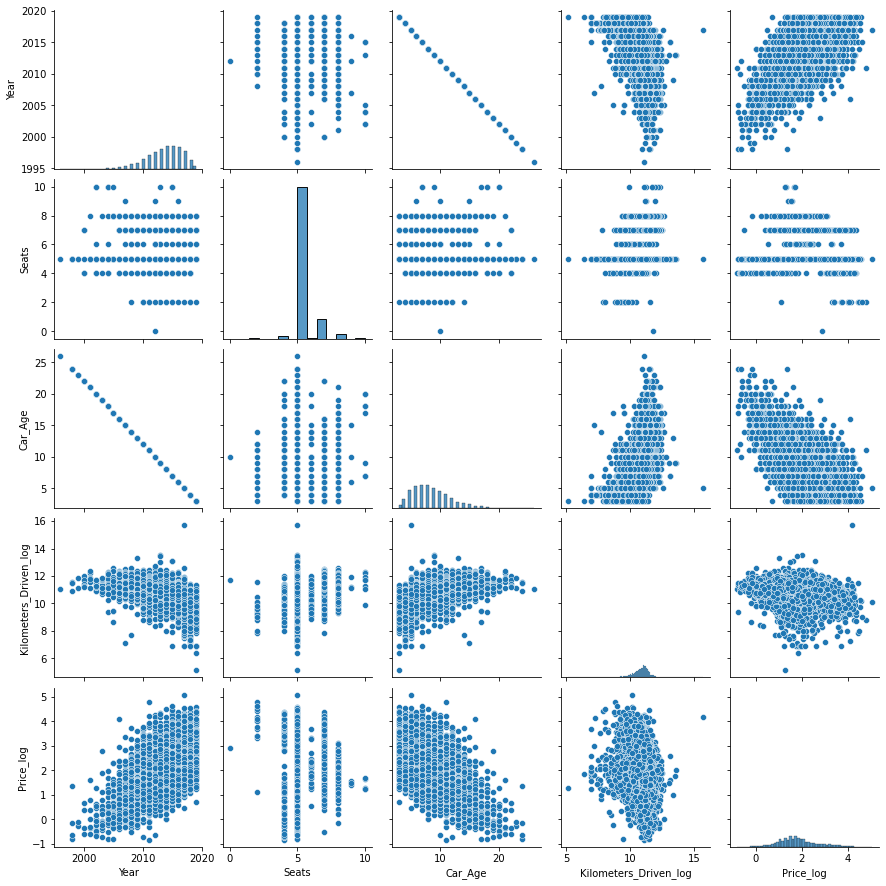

In [55]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

Pair Plot provides below insights:

The variable Year has a positive correlation with price and mileage.


A year has a Negative correlation with kilometers-Driven.


Mileage is negatively correlated with Power.


As power increases, mileage decreases.


Car with recent make is higher at prices. As the age of the car increases price decreases.


Engine and Power increase, and the price of the car increases.

A bar plot can be used to show the relationship between Categorical variables and continuous variables 

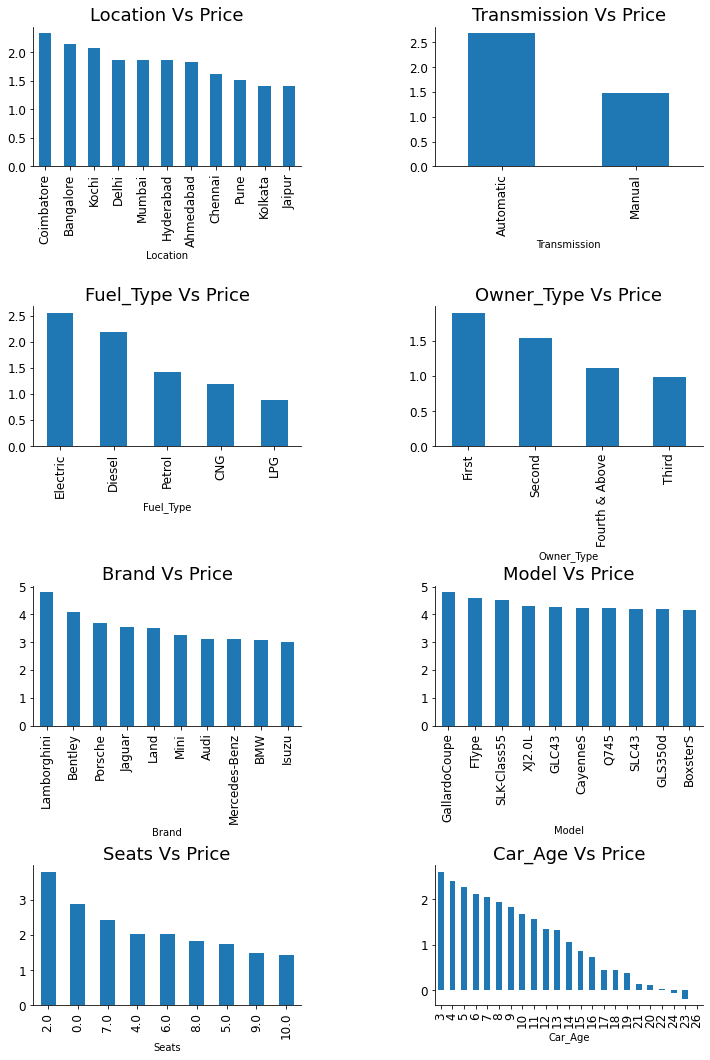

In [56]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
data.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
data.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

Observations

The price of cars is high in Coimbatore and less price in Kolkata and Jaipur.


Automatic cars have more price than manual cars.


Diesel and Electric cars have almost the same price, which is maximum, and LPG cars have the lowest price.


First-owner cars are higher in price, followed by a second.


The third owner’s price is lesser than the Fourth and above.


Lamborghini brand is the highest in price.


Gallardocoupe Model is the highest in price.


2 Seater has the highest price followed by 7 Seater.


The latest model cars are high in price.

# EDA Multivariate Analysis

Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset. We use this technical when we have more than two variables.

A heat map is widely been used for Multivariate Analysis.
Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

In our case heat map shows the correlation between the variables.

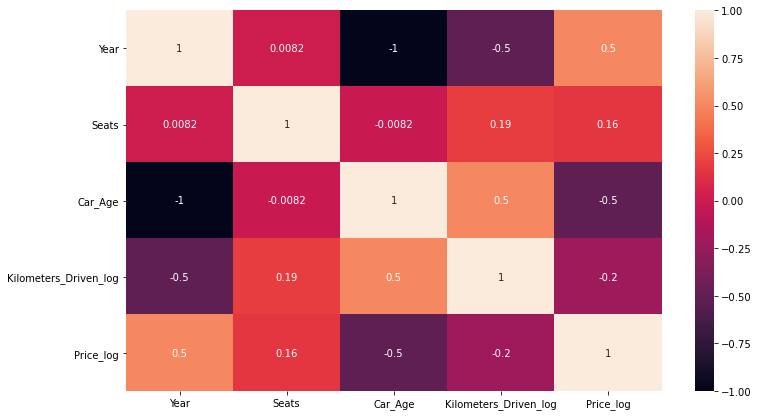

In [57]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Kilometers_Driven','Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

From the Heat map, we can infer the following:

The engine has a strong positive correlation to Power 0.86.


Price has a positive correlation to Engine 0.69 as well Power 0.77.


Mileage has correlated to Engine, Power, and Price negatively.


Price is moderately positive in correlation to year.


Kilometer driven has a negative correlation to year not much impact on the price.


Car age has a negative correlation with Price.


car Age is positively correlated to Kilometers-Driven as the Age of the car increases; then the kilometer will also increase of car has a negative correlation with Mileage this makes sense.

# Impute Missing values

Missing data arise in almost all statistical analyses. There are many ways to impute missing values; we can impute the missing values by their Mean, median, most frequent, or zero values and use advanced imputation algorithms like KNN, Regularization, etc.

We cannot impute the data with a simple Mean/Median. We must need business knowledge or common insights about the data. If we have domain knowledge, it will add value to the imputation. Some data can be imputed on assumptions.

In our dataset, we have found there are missing values for many columns like Mileage, Power, and Seats.

We observed earlier some observations have zero Mileage. This looks like a data entry issue. We could fix this by filling null values with zero and then the mean value of Mileage since Mean and Median values are nearly the same for this variable chosen Mean to impute the values.

In [58]:
data.loc[data["Mileage"]==0.0,'Mileage']=np.nan
data.Mileage.isnull().sum()

2

In [65]:
#data['Mileage'].fillna(value=np.mean(data['Mileage']),inplace=True)

Similarly, imputation for Seats. As we mentioned earlier, we need to know common insights about the data.

Let’s assume some cars brand and Models have features like Engine, Mileage, Power, and Number of seats that are nearly the same. Let’s impute those missing values with the existing data:

In [67]:
#data.Seats.isnull().sum()
#data['Seats'].fillna(value=np.nan,inplace=True)
#data['Seats']=data.groupby(['Model','Brand'])['Seats'].apply(lambda x:x.fillna(x.median()))
#data['Engine']=data.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median()))
#data['Power']=data.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median()))

Conclusion


In this project we have analyzed the factors influencing the used car’s price.

Data Analysis helps to find the basic structure of the dataset.

Dropped columns that are not adding value to our analysis.

Performed Feature Engineering by adding some columns which contribute to our analysis.

Data Transformations have been used to normalize the columns.

We used different visualizations for EDA like Univariate, Bi-Variate, and Multivariate Analysis.
Through EDA, we got useful insights, and below are the factors influencing the price of the car and a few takeaways

Most of the customers prefer 2 Seat cars hence the price of the 2-seat cars is higher than other cars.

The price of the car decreases as the Age of the car increases.

Customers prefer to purchase the First owner rather than the Second or Third.

Due to increased Fuel price, the customer prefers to purchase an Electric vehicle.

Automatic Transmission is easier than Manual.

This way, we perform EDA on the datasets to explore the data and extract all possible insights, which can help in model building and better decision making.

If the EDA process is clear and precise, our model will work better and gives higher accuracy!
